
            --------------------Data Analyst Intern, Project-1---------------------


Problem : **Choose an appropriate model for the project to predict the customers who are eligible for the loan and also find out what are the missing criteria, why other customers are not eligible for the loan and answer the following questions.**

1. What's the ratio of male to female?
2. hom many Males are married and non-married?
3. how many females are married and non-married?
4. how many Males and Females are graduated and non-graduated with respect to their Martial status?
5. Which type of encoding will be required to perform on the "Education" column?
6. Is it a male or a female whose loan amount is highest?
7. The specification and information about the applicant who has the higest income?
8. What all featueres are you going to consider for the model traing and why?
9. Which model are you going to choose and define the reason for going with the same model?
10. Have you performed the Hyper Parameter Tuning?
11. Compare the Actual results with the predicted results?
12. What's the accuracy of your model?
13.In order to improve the accuracy, what more approaches can be done?
14. What can you conclude with respect to the data?

Dataset Information:

Loan_ID----------------> Unique Loan ID.

Gender ----------------> Male/ Female

Married ---------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount ------------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)

**Dataset :** https://drive.google.com/drive/folders/1-QOrDBpVvXWb_zAsaxZnalmvUQRA7yOb?usp=sharing

**Abstract:** Our task is to automate the loan eligibility process based on customer detail. These details are Gender, Marital Status, Number of Dependents, Education, Income, Loan Amount, Credit History, loan status and other.

**Header file**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns       
%matplotlib inline 

**Exploratory data analysis**

In [2]:
#feteching dataset from google drive

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1MnHp15OkJb5-Zw3K5F29mH9o9CG7L-8x/view?usp=sharing'  #link for getting train dataset

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Training Data.csv')

train = pd.read_csv('Training Data.csv')
print(train)

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]


In [4]:
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})   
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
link2 = 'https://drive.google.com/file/d/1Rkwjxn27wTfm6lUkSoNWhaV0qbc7--yi/view?usp=sharing'  #link for getting test dataset

# to get the id part of the file
id2 = link2.split("/")[-2]

downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('Testing Data.csv')

test = pd.read_csv('Testing Data.csv')
print(test)

      Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 rows x 12 columns]


In [6]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [7]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We found some values(data) were missing. So, we have to clean the data first. Also, there seems to be some outliers for the applicant income, coapplicant income and loan amount. It was also found that about 83% of applicants have a credit_history.

# Finding the null value

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


Firstly, we study the distribution of variables between the Applicant income and the loan amount. Data visulization with the help of seaborn.

#**Data visulization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


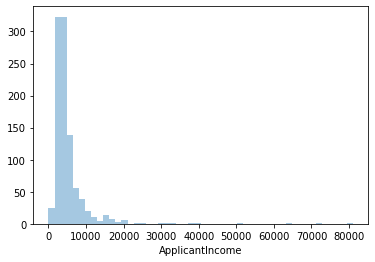

In [11]:
sns.distplot(data.ApplicantIncome,kde=False)

The distribution is skewed and we can notice quite a few outliers. As there seems to be some missing values in Loan Amount, we can't plot it directly, but if we drop the missing values then plot it, this can be possible with **dropna function**.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


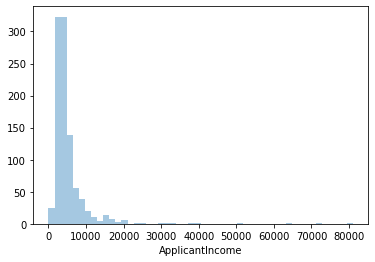

In [12]:
sns.distplot(data.ApplicantIncome.dropna(),kde=False)

#Ploting graph between Education and ApplicantIncome.

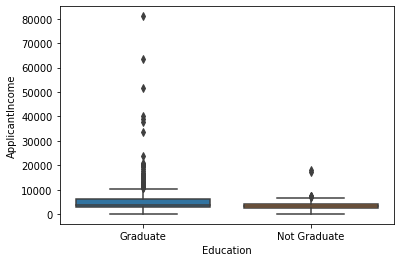

In [13]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

It can be observed that the graduates have more outliers which means that the people with huge income are most likely well educated.


Another interesting variable is credit history , to check how it affects the Loan Status we can turn it into binary then calculate it’s mean for each value of credit history . A value close to 1 indicates a high loan success rate.

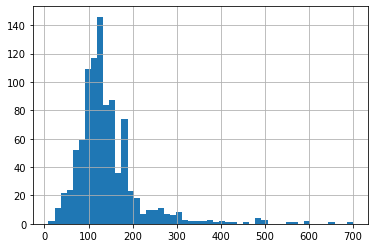

In [14]:
data['LoanAmount'].hist(bins=50)

## **Q. 6 Is it a male or a female whose loan amount is the highest?**

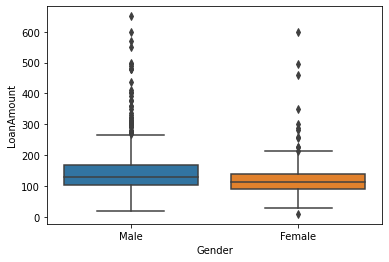

In [15]:
# Box Plot for variable LoanAmount by variable Gender of training data set
#train.boxplot(column='LoanAmount', by = 'Gender')
sns.boxplot(x='Gender',y='LoanAmount',data=data)



> It can be observed that Male are getting higher loan amount then female.



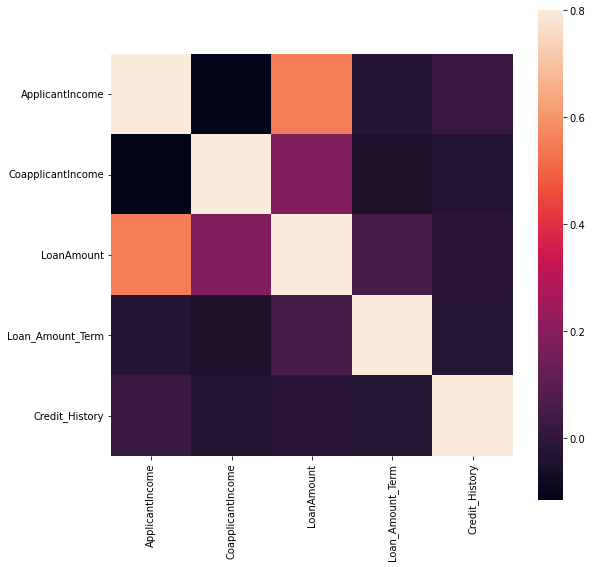

In [16]:
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

#**Data cleaning**

In [17]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

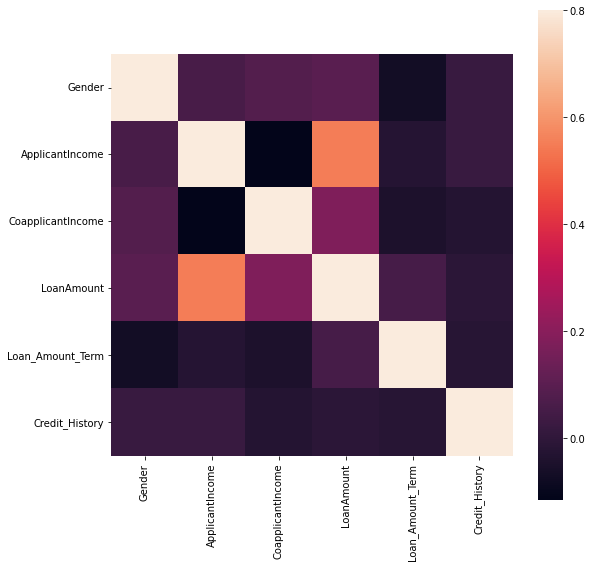

In [18]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [19]:
data.Married=data.Married.map({'Yes':1,'No':0})

In [20]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [21]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [22]:
data.Dependents.value_counts()

0.0    545
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

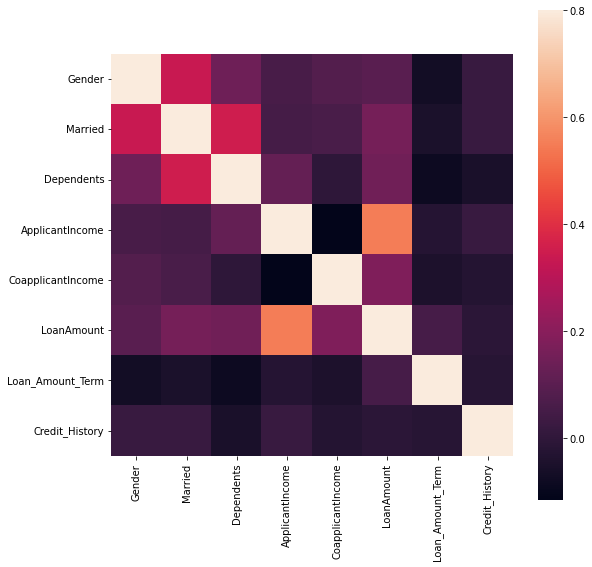

In [23]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [24]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [25]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [26]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [27]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [28]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [29]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [30]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

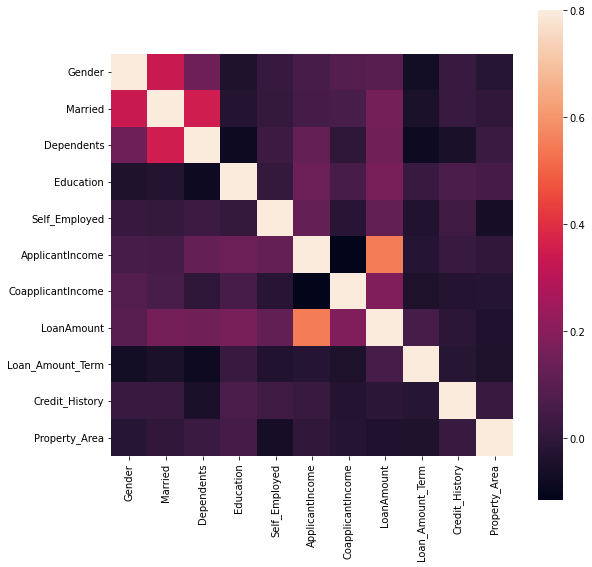

In [31]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [33]:
data.Credit_History.size

981

In [34]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [35]:
#rechecking for remaining null value
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

For numerical values a good solution is to fill missing values with the **mean** , for categorical we can fill them with the **mode**.

In [36]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [37]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [38]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [39]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [40]:
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [41]:
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [42]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [43]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

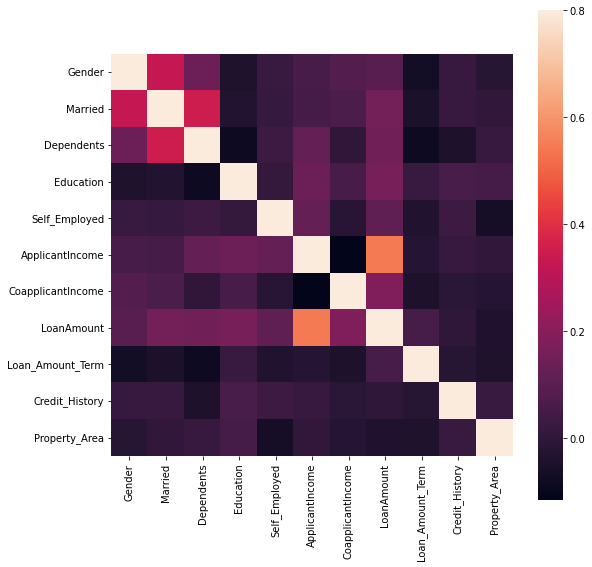

In [44]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [45]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [46]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now there are no null vlaues.

#**Data preprocessing**

In [47]:
data.drop('Loan_ID',inplace=True,axis=1)

In [48]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Next we have to handle the outliers , one solution is just to remove them but we can also log transform them to **nullify** their effect which is the approach that we went for here.

Some people might have a low income but strong **CoappliantIncome** so a good idea is to combine them in a **TotalIncome** column.

In [49]:
#prepare for train model_data 
train_X=data.iloc[:614,]
train_y=Loan_status
X_test=data.iloc[614:,]
seed=7

#**Data modelling**

#Q.8 What all features are you going to consider for the model training and why? 
Answer: After cleaning all the data, we will check which model will give the best accuracy with training and work with that model furthermore.

Accuracy is very important part of modelling, thats why having model with higher accuracy rate will give precise result in prediction process.

Here we are going to use **sklearn for our models** and check which algorithm will give perfrom better with higher accuracy. Then we will use that to perform further task.

In [50]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))

In [53]:
seed=7
scoring='accuracy'

In [54]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [55]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

logreg 0.804348 0.048610
tree 0.702174 0.092257
lda 0.806522 0.050936
svc 0.684783 0.060908
knn 0.636957 0.068089
nb 0.789130 0.036441


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


**output:**

logreg 0.804348 0.048610 -> (logistic regression)

tree 0.713043 0.043260   -> (DecisionTreeClassifier)

lda 0.806522 0.050936  -> (LinearDiscriminantAnalysis)

svc 0.684783 0.060908  -> (SVC)
 
knn 0.636957 0.068089  -> (KNeighborsClassifier)

nb 0.789130 0.036441  -> (GaussianNB)


#Q.9 Which model are you going to use?
Answer: As from above result, it can be seen that *logistic regression* is given the precise result. So, it will be use as a model.

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
print('Accuracy =', round(accuracy_score(test_y,pred)*100),'%')
#print('accuracy =', int(accuracy_score(test_y,pred)*100),'%')
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Accuracy = 82 %
[[ 23  25]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        48
           1       0.81      0.98      0.89       106

    accuracy                           0.82       154
   macro avg       0.86      0.73      0.76       154
weighted avg       0.84      0.82      0.81       154



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###Acuracy is 80 %

In [57]:
df_output=pd.DataFrame()

In [58]:
outp=svc.predict(X_test).astype(int)
outp

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [59]:
df_output['Loan_ID']=Loan_ID
df_output['Loan_Status']=outp

#**Final output** -> Result

In [67]:
df_output.head(26)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [61]:
print(df_output)

      Loan_ID  Loan_Status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001035            1
4    LP001051            1
..        ...          ...
362  LP002971            1
363  LP002975            1
364  LP002980            1
365  LP002986            1
366  LP002989            1

[367 rows x 2 columns]


#**Pickle Model**

In [62]:
import pickle

In [63]:
file = df_output

In [64]:
fileNAme = "Proj_01.pkl"  

In [65]:
fileObj = open(fileNAme, 'wb')   # wb for write
pickle.dump(file, fileObj)

fileObj.close() #file close

#########END OF CODE############

Q.1 What's the ratio of male to female?

Ans. With reference to *code line- 193*, there are '775' male and '206' female.
so, the answer is **3.76:1** 

Q.2 How many males are married and non married?

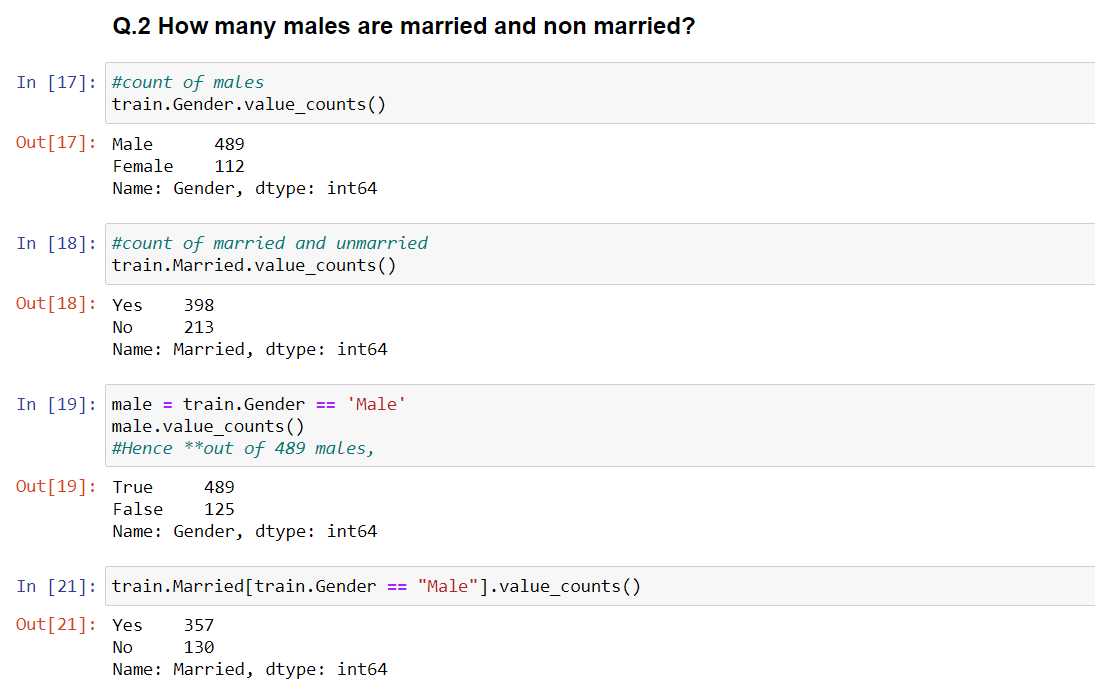

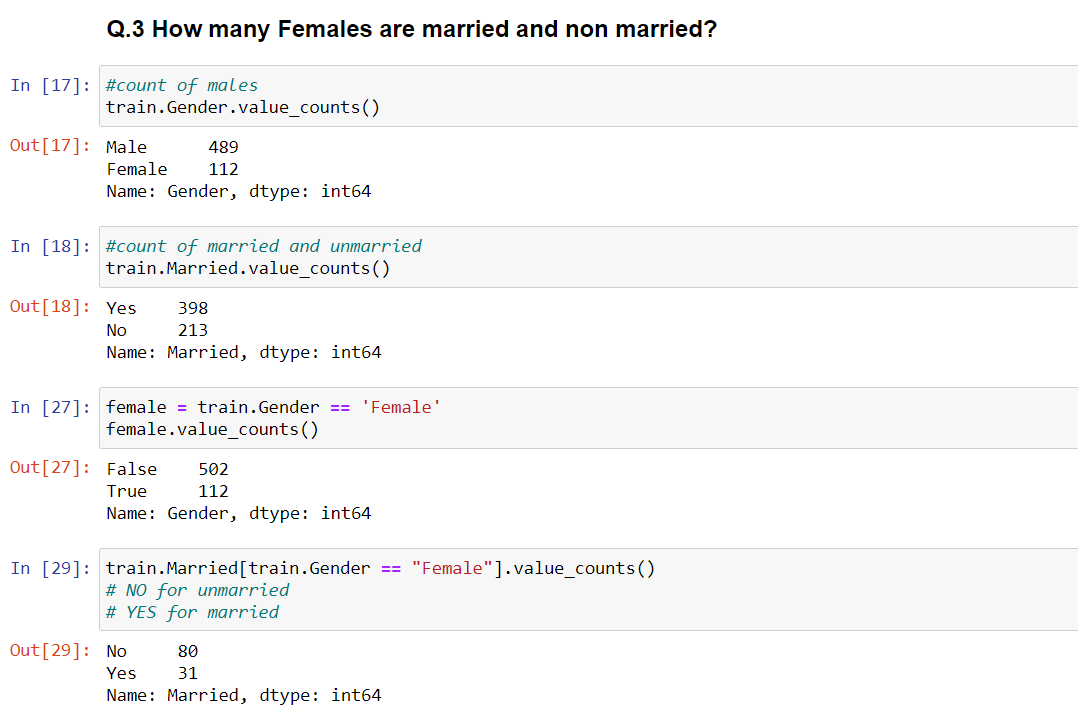